In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!pwd

/home/hassib12/code/hassib12/FoodSecurityForecaster/notebooks


In [7]:
Aweil_data = pd.read_pickle('../raw_data/raw_pixels/Al Mabien.zip')

In [8]:
Aweil_data

band       date  value
0              DayOfYear 2010-01-01     11
1             DetailedQA 2010-01-01   2112
2                    EVI 2010-01-01   1099
3                   NDVI 2010-01-01   2219
4        RelativeAzimuth 2010-01-01  -5100
...                  ...        ...    ...
2185915       ViewZenith 2017-12-19   1454
2185916     sur_refl_b01 2017-12-19    748
2185917     sur_refl_b02 2017-12-19   1292
2185918     sur_refl_b03 2017-12-19    284
2185919     sur_refl_b07 2017-12-19   1302

[2185920 rows x 3 columns]

In [5]:
Aweil_df = Aweil_data[Aweil_data['band'] == 'NDVI']
Aweil_df

band       date  value
3        NDVI 2010-01-01   2726
15       NDVI 2010-01-17   2666
27       NDVI 2010-02-02   2630
39       NDVI 2010-02-18   2565
51       NDVI 2010-03-06   2648
...       ...        ...    ...
2185863  NDVI 2017-10-16   6008
2185875  NDVI 2017-11-01   4888
2185887  NDVI 2017-11-17   3918
2185899  NDVI 2017-12-03   3861
2185911  NDVI 2017-12-19   3456

[182160 rows x 3 columns]

In [6]:
value_min, value_max = Aweil_df['value'].min(), Aweil_df['value'].max()
value_min, value_max

(34, 9025)

In [7]:
histograms = []
dates = []
for date, group in Aweil_df.groupby('date'):
    hist = np.histogram(group['value'], bins=10, range=(0,9000))[0]
    histograms.append(hist)
    dates.append(date)

In [8]:
Aweil_histogram_df = pd.DataFrame(histograms, index=dates)

In [9]:
Aweil_histogram_df

0  1    2    3    4    5    6    7   8  9
2010-01-01  0  0  113  707  162    8    0    0   0  0
2010-01-17  0  0  239  666   85    0    0    0   0  0
2010-02-02  0  0  305  580  103    2    0    0   0  0
2010-02-18  0  1  378  485  118    8    0    0   0  0
2010-03-06  0  1  378  482  127    2    0    0   0  0
...        .. ..  ...  ...  ...  ...  ...  ...  .. ..
2017-10-16  0  0    0    0    6   92  415  401  76  0
2017-11-01  0  0    0    4   75  212  459  229  11  0
2017-11-17  0  0    8  195  340  259  177   11   0  0
2017-12-03  0  0   16  311  397  198   67    1   0  0
2017-12-19  0  0   30  556  366   38    0    0   0  0

[184 rows x 10 columns]

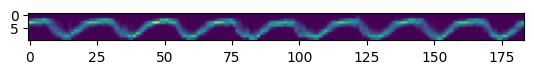

In [10]:
plt.imshow(Aweil_histogram_df.to_numpy().T)

In [11]:
import os

In [12]:
data_path = '../raw_data/raw_pixels'

In [13]:
os.listdir(data_path)

['Fashooda.zip',
 'Aliab.zip',
 'Ayod.zip',
 'Rabkona.zip',
 'Raja.zip',
 'Yerol.zip',
 'Meridi.zip',
 'Malut.zip',
 'Mayot.zip',
 'Aweil.zip',
 'Malek.zip',
 'Baleit.zip',
 'Pibor.zip',
 'Al Renk.zip',
 'Terkaka.zip',
 'Kajo Kaii.zip',
 'Nahr Lol.zip',
 'Tombura.zip',
 'Shobet.zip',
 'Faring.zip',
 'Al Leiri.zip',
 'Gogrial.zip',
 'Kapoeta.zip',
 'Al Mabien.zip',
 'Wanjuk.zip',
 'Tonga.zip',
 'Shokodom.zip',
 'Magwi.zip',
 'Sobat.zip',
 'Yambio.zip',
 'Fam al Zaraf.zip',
 'Rumbek.zip',
 'Bor.zip',
 'Nahr Atiem.zip',
 'Warab.zip',
 'Nahr Yei.zip',
 'Wat.zip',
 'Aryat.zip',
 'Mundri.zip',
 'Wau.zip',
 'Tonj.zip',
 'Al Mayom.zip',
 'Akobo.zip',
 'Amatonge.zip',
 'Bahr al Jabal.zip']

In [14]:
multi_df = []
files = []

In [15]:
for file in os.listdir(data_path):
    df = pd.read_pickle(os.path.join(data_path, file))
    multi_df.append(df)
    files.append(file)

In [16]:
multi_df

[                    band       date  value
 0              DayOfYear 2010-01-01      2
 1             DetailedQA 2010-01-01   2112
 2                    EVI 2010-01-01   1293
 3                   NDVI 2010-01-01   2373
 4        RelativeAzimuth 2010-01-01  13024
 ...                  ...        ...    ...
 2199163       ViewZenith 2017-12-19    153
 2199164     sur_refl_b01 2017-12-19   1132
 2199165     sur_refl_b02 2017-12-19   2120
 2199166     sur_refl_b03 2017-12-19    537
 2199167     sur_refl_b07 2017-12-19   1805
 
 [2199168 rows x 3 columns],
                     band       date  value
 0              DayOfYear 2010-01-01      2
 1             DetailedQA 2010-01-01   2181
 2                    EVI 2010-01-01    879
 3                   NDVI 2010-01-01   2294
 4        RelativeAzimuth 2010-01-01  13799
 ...                  ...        ...    ...
 2174875       ViewZenith 2017-12-19    451
 2174876     sur_refl_b01 2017-12-19    453
 2174877     sur_refl_b02 2017-12-19   2990
 

In [17]:
multi_df = sorted(multi_df, key = lambda df: df.attrs['state_name'])

In [18]:
ndvi = []
for df in multi_df:
    ndvi_df = df[df['band'] == 'NDVI']
    ndvi.append(ndvi_df)

In [19]:
stacked_ndvi = pd.concat(ndvi)
total_value_min, total_value_max = stacked_ndvi['value'].min(), stacked_ndvi['value'].max()
total_value_min, total_value_max

(-1998, 9741)

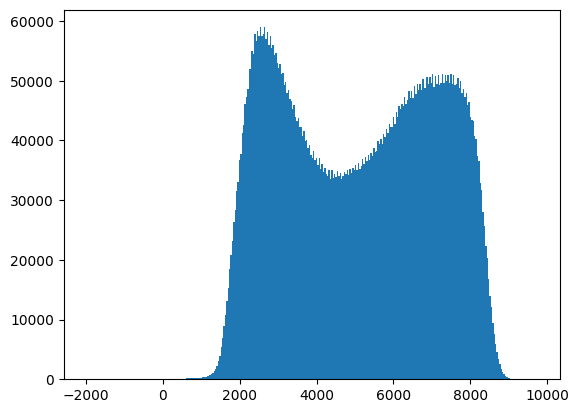

In [20]:
plt.hist(stacked_ndvi['value'], bins='auto');

In [21]:
num_years = stacked_ndvi['date'].dt.year.nunique()
num_counties = len(ndvi)
num_samples = stacked_ndvi['date'].nunique() // num_years
num_years, num_counties, num_samples

(8, 45, 23)

In [22]:
# (num_years, num_counties, num_samples, num_bins, 1)

num_bins = 10

X = np.zeros((num_years, num_counties, num_samples, num_bins, 1))

for county_index, ndvi_df in enumerate(ndvi):
    for year_index, (year, year_group) in enumerate(ndvi_df.groupby(ndvi_df['date'].dt.year)):
        for sample_index, (sample_date, sample_group) in enumerate(year_group.groupby('date')):
            hist = np.histogram(sample_group['value'], bins=10, range=(0, total_value_max))[0]
            X[year_index,county_index,sample_index,:,0] = hist
    

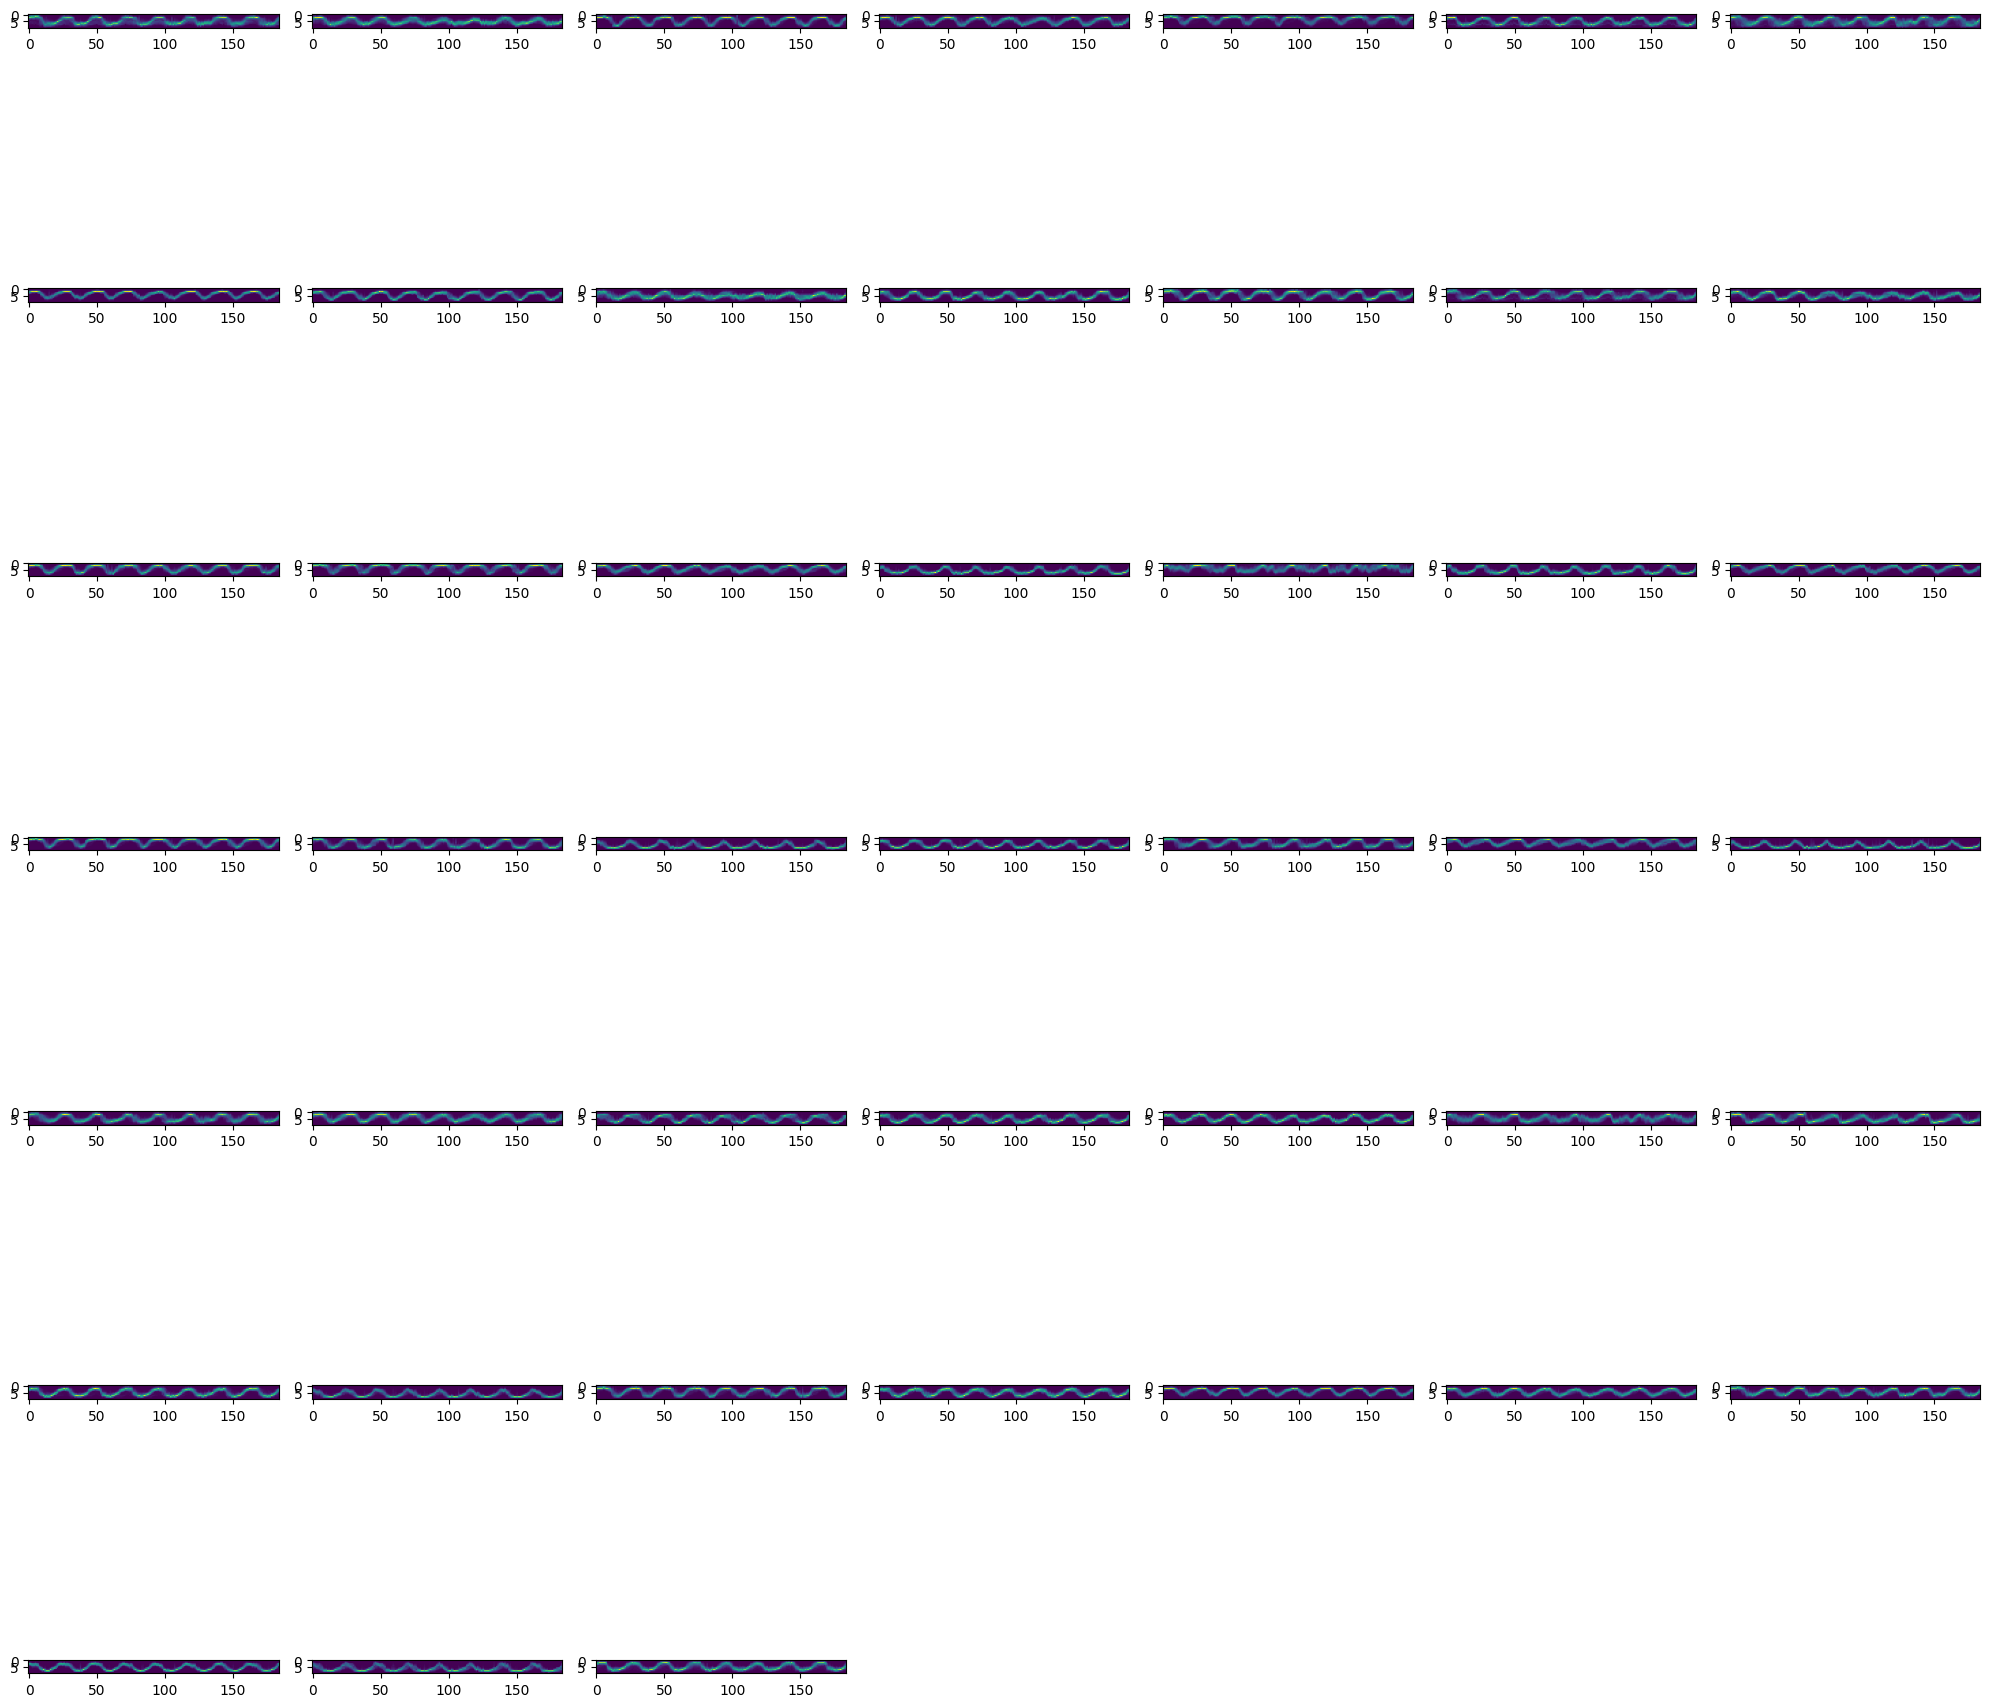

In [23]:
fig = plt.gcf()
fig.set_size_inches(20, 20)
for i in range(num_counties):
    plt.subplot(7, 7, i + 1)
    plt.imshow(X[:,i,:,:,0].reshape((num_years * num_samples, num_bins)).T);
fig.tight_layout()

In [24]:
np.savez_compressed('../data/SSD_data', X=X, county_names=np.array([df.attrs['state_name'] for df in ndvi]))

In [25]:
!ls ../data

SSD_data.npz


In [26]:
loaded = np.load('../data/SSD_data.npz')

In [28]:
loaded['county_names']

array(['Akobo', 'Al Leiri', 'Al Mabien', 'Al Mayom', 'Al Renk', 'Aliab',
       'Amatonge', 'Aryat', 'Aweil', 'Ayod', 'Bahr al Jabal', 'Baleit',
       'Bor', 'Fam al Zaraf', 'Faring', 'Fashooda', 'Gogrial',
       'Kajo Kaii', 'Kapoeta', 'Magwi', 'Malek', 'Malut', 'Mayot',
       'Meridi', 'Mundri', 'Nahr Atiem', 'Nahr Lol', 'Nahr Yei', 'Pibor',
       'Rabkona', 'Raja', 'Rumbek', 'Shobet', 'Shokodom', 'Sobat',
       'Terkaka', 'Tombura', 'Tonga', 'Tonj', 'Wanjuk', 'Warab', 'Wat',
       'Wau', 'Yambio', 'Yerol'], dtype='<U13')